In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset
dataset = pd.read_csv("C:\\Users\\udaya\\Downloads\\archive (2)\\diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Text(0.5, 1.0, 'Correlation heatmap')

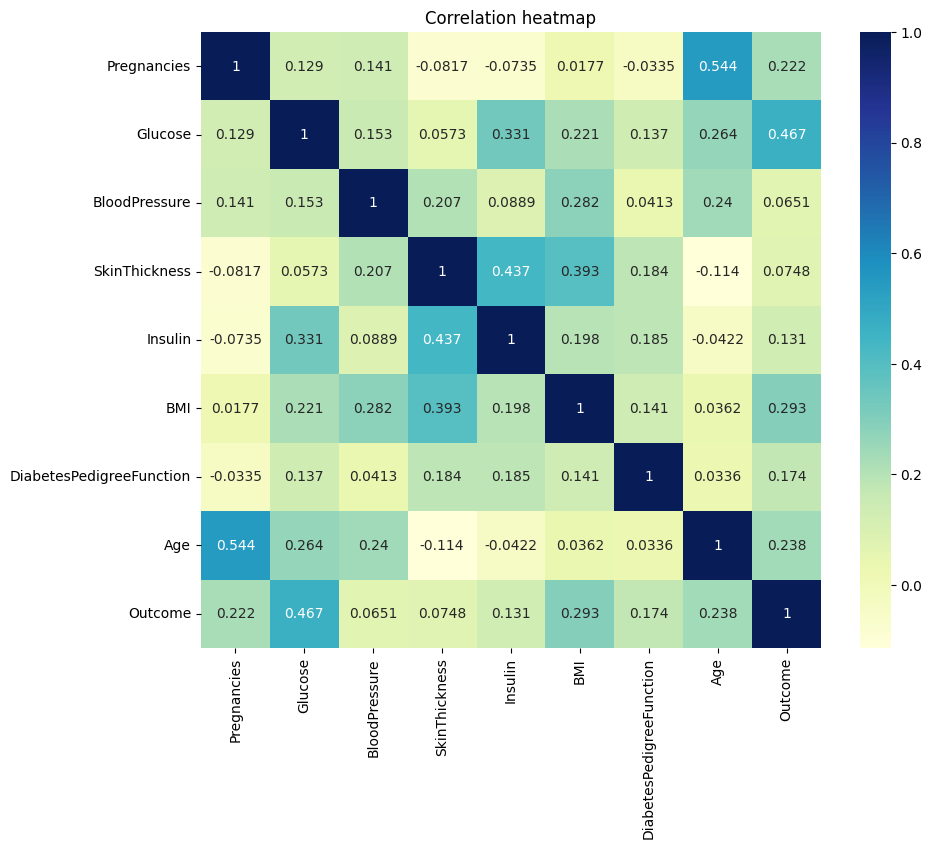

In [8]:
# Correlation plot of independent variables
plt.figure(figsize =(10,8))
sns.heatmap(dataset.corr(), annot = True, fmt=".3g", cmap = "YlGnBu")
plt.title("Correlation heatmap")         

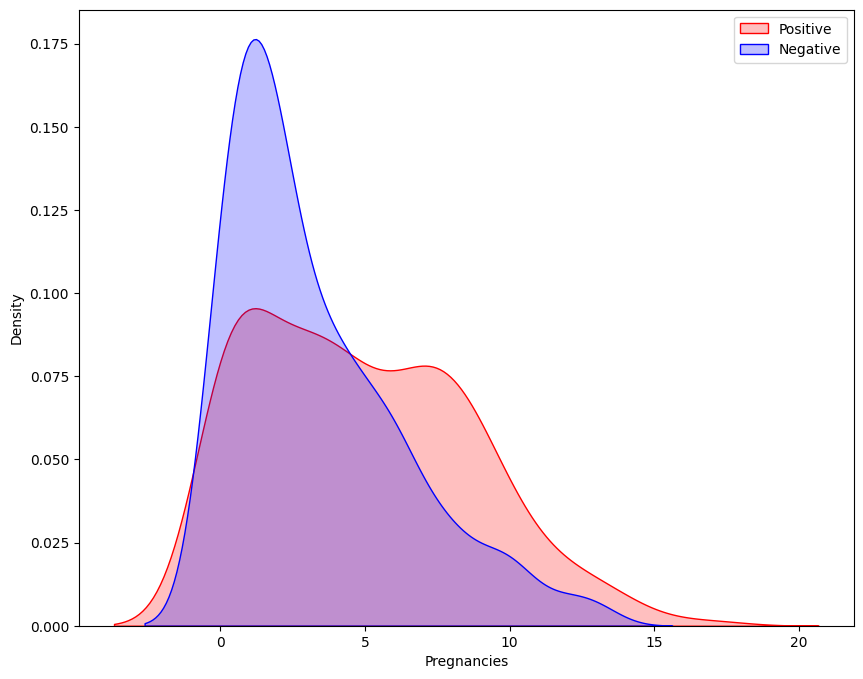

In [9]:
# Exploring Pregnancies and traget variables
plt.figure(figsize =(10,8))
# Plotting Density function graph of the pregnancies and traget variables
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color = "Blue", fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

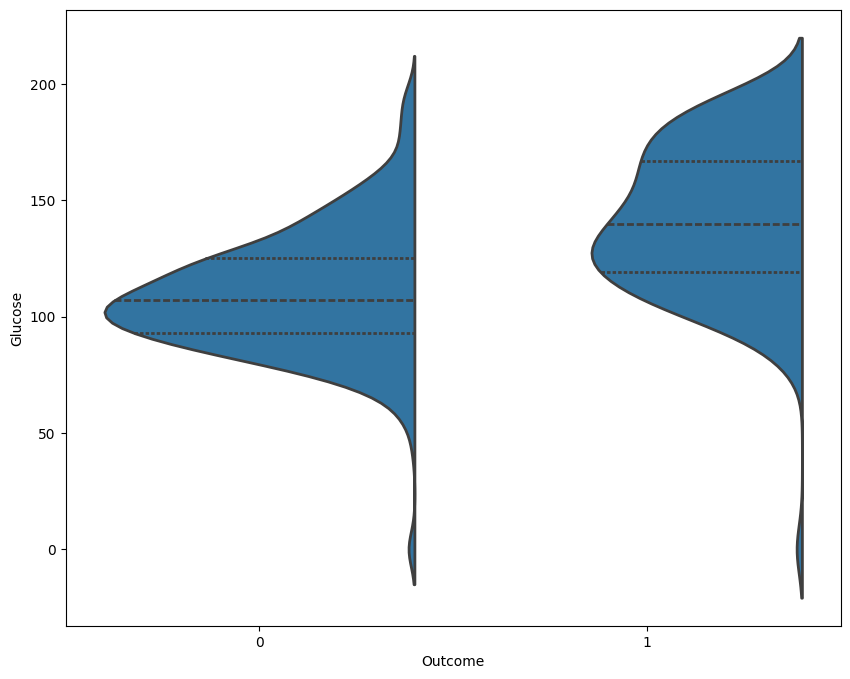

In [10]:
# Exploring Glucose and traget variables
plt.figure(figsize =(10,8))
sns.violinplot(data=dataset, x="Outcome", y="Glucose", split = True, linewidth=2, inner = "quart")

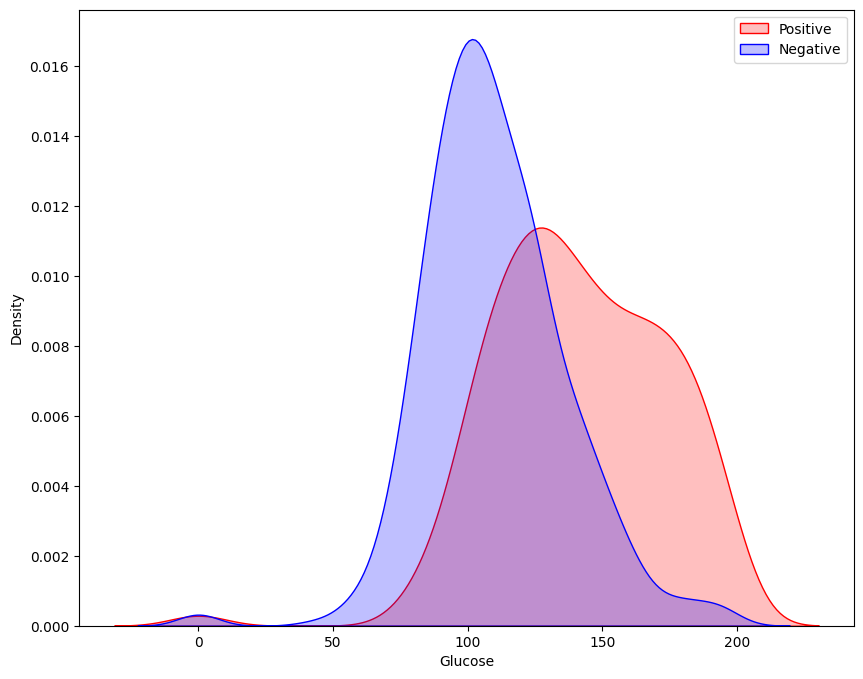

In [11]:
# Exploring Glucose and traget variables
plt.figure(figsize =(10,8))
# Plotting Density function graph of the glucose and traget variables
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color = "Red", fill = True)
kde = sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color = "Blue", fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

In [12]:
# Replacing 0 values with the mean or median of the respective feature
# Gucose
dataset["Glucose"] = dataset["Glucose"].replace(0, dataset["Glucose"].median())
# BloodPressure
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0, dataset["BloodPressure"].median())
# BMI
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].mean())
# SkinThickness
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())
# Insulin
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())

In [13]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [14]:
# Splitting the dependent and independent variables
X = dataset.drop(["Outcome"], axis = 1)
y = dataset["Outcome"]

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [17]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [19]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,20.536458,79.799479,24.0,1.022,34
223,7,142,60,33.000000,190.000000,28.8,0.687,61
393,4,116,72,12.000000,87.000000,22.1,0.463,37
766,1,126,60,20.536458,79.799479,30.1,0.349,47
570,3,78,70,20.536458,79.799479,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35.000000,140.000000,28.6,0.411,26
106,1,96,122,20.536458,79.799479,22.4,0.207,27
270,10,101,86,37.000000,79.799479,45.6,1.136,38
435,0,141,72,20.536458,79.799479,42.4,0.205,29


In [20]:
# KNN
from sklearn.neighbors import KNeighborsClassifier


In [21]:
training_accuracy = []
test_accuracy = []
for n_neighbours in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn.fit(X_train, y_train)

    # check accuracy score
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    

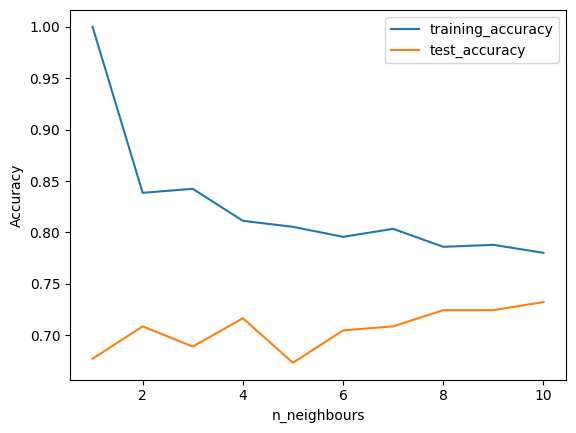

In [22]:
plt.plot(range(1,11), training_accuracy, label = "training_accuracy")
plt.plot(range(1,11), test_accuracy, label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.legend()

In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train), ": Training accuracy")
print(knn.score(X_test, y_test), ": Test accuracy")

0.7879377431906615 : Training accuracy
0.7244094488188977 : Test accuracy


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train), ": Training accuracy")
print(dt.score(X_test, y_test), ": Test accuracy")

1.0 : Training accuracy
0.6811023622047244 : Test accuracy


In [25]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=3)
dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train), ": Training accuracy")
print(dt1.score(X_test, y_test), ": Test accuracy")

0.77431906614786 : Training accuracy
0.6929133858267716 : Test accuracy


In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train), ": Training accuracy")
print(mlp.score(X_test, y_test), ": Test accuracy")

0.7509727626459144 : Training accuracy
0.6811023622047244 : Test accuracy


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [28]:
mlp1 = MLPClassifier(random_state=0)
mlp1.fit(X_train, y_train)
print(mlp1.score(X_train, y_train), ": Training accuracy")
print(mlp1.score(X_test, y_test), ": Test accuracy")

0.7626459143968871 : Training accuracy
0.6850393700787402 : Test accuracy


In [30]:
input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input_data to numpy array
input_arr = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_reshaped = input_arr.reshape(1, -1)

# standardize the input data
std_data = sc.transform(input_reshaped)
print(std_data)

prediction = mlp1.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[[ 0.00777311 -0.34870779  1.64073311 -2.64013783 -1.30251761  0.71870965
  -0.90202656 -0.28282393]]
[0]
The person is not diabetic


C:\Users\udaya\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\udaya\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
